In [0]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

In [6]:
import tensorflow as tf
print(tf.__version__)

2.1.0-rc1


In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

# import os
# print(os.listdir("../input"))
from google.colab import files
uploaded = files.upload()

import io
bank_data  = pd.read_csv(io.BytesIO(uploaded['bank.csv']))

Saving bank.csv to bank.csv


In [8]:
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Delete some features:

We can drop feature 'Surname', 'RowNumber', 'CustomerId'

since these feature can not take any influence on the final result

In [0]:
bank_data_new = bank_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1)
   

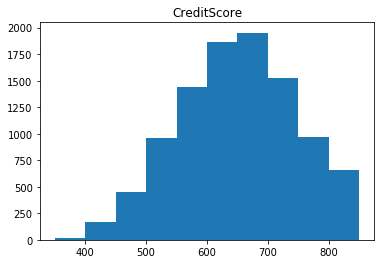

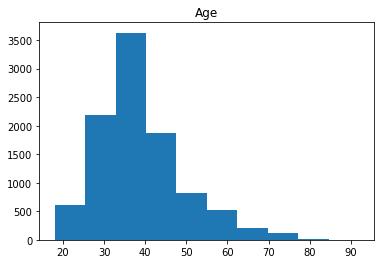

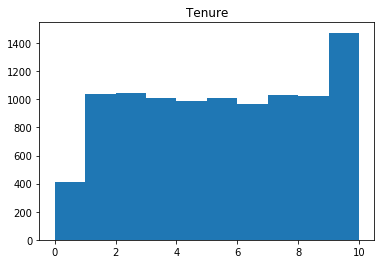

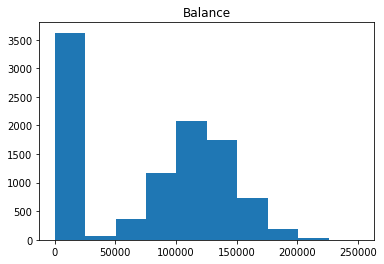

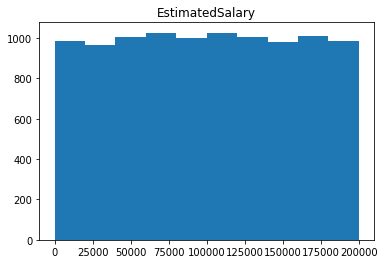

In [12]:
import matplotlib.pyplot as plt
numerical_distribution = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
for i in numerical_distribution:
    plt.hist(bank_data_new[i])
    plt.title(i)
    plt.show()

In [13]:
bank_data_new['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

For the feature 'Gender', which have 2 optional values, we can use method 'labelEncoder' to fit it as 0-1 value

For the feature Geography', which have 3 optional values, we convert categorical variable into dummy variables

In [0]:
#Converting the Gender Column to Numeric
bank_data_new['gender_Class']=0
bank_data_new.loc[(bank_data_new['Gender']=='Female'), 'gender_Class'] = 1

In [15]:
print(bank_data_new['gender_Class'].value_counts())
bank_data_new.ix[1:10,['Gender','gender_Class']]

0    5457
1    4543
Name: gender_Class, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


,Gender,gender_Class
1,Female,1
2,Female,1
3,Female,1
4,Female,1
5,Male,0
6,Male,0
7,Female,1
8,Male,0
9,Male,0
10,Male,0


In [16]:
bank_data_new[bank_data_new['Balance']==0.0].count()

CreditScore        3617
Geography          3617
Gender             3617
Age                3617
Tenure             3617
Balance            3617
NumOfProducts      3617
HasCrCard          3617
IsActiveMember     3617
EstimatedSalary    3617
Exited             3617
gender_Class       3617
dtype: int64

In [17]:
bank_data_new['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

There is a imbalance between the two classes and the model will incorrectly learn the classification since the number of people leaving 25.5% and 74.5% people did not exit the bank we could use synthetic data to correct this imbalance

In [18]:


Obviously, these feature can not take any influence on the final resu
X = bank_data_new.drop(['Exited','Gender','Geography'],axis=1) # Credit Score through Estimated Salary - features
y = bank_data_new['Exited'] # Exited target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (8000, 9)
Number transactions y_train dataset:  (8000,)
Number transactions X_test dataset:  (2000, 9)
Number transactions y_test dataset:  (2000,)


In [0]:
#Normalize the dataset

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#tf.set_random_seed(42)
#Initialize Sequential model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(activation = 'relu', input_dim = 9, units=6, kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(activation = 'relu', units=6, kernel_initializer='uniform')) 
model.add(tf.keras.layers.Dense(activation = 'sigmoid', units=1, kernel_initializer='uniform')) 


In [21]:
from keras import optimizers
sgd = tf.keras.optimizers.SGD(lr=0.03)
#Compile the model
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 60        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


In [22]:
history_sgd = model.fit(X_train, y_train, batch_size=10, epochs=40)

Train on 8000 samples
Epoch 1/40
8000/8000 [==============================] - 2s 192us/sample - loss: 0.5253 - accuracy: 0.7954
Epoch 2/40
8000/8000 [==============================] - 1s 127us/sample - loss: 0.5060 - accuracy: 0.7960
Epoch 3/40
8000/8000 [==============================] - 1s 121us/sample - loss: 0.5059 - accuracy: 0.7960
Epoch 4/40
8000/8000 [==============================] - 1s 125us/sample - loss: 0.5055 - accuracy: 0.7960
Epoch 5/40
8000/8000 [==============================] - 1s 123us/sample - loss: 0.5030 - accuracy: 0.7960
Epoch 6/40
8000/8000 [==============================] - 1s 123us/sample - loss: 0.4820 - accuracy: 0.7958
Epoch 7/40
8000/8000 [==============================] - 1s 123us/sample - loss: 0.4352 - accuracy: 0.8023
Epoch 8/40
8000/8000 [==============================] - 1s 125us/sample - loss: 0.3973 - accuracy: 0.8261
Epoch 9/40
8000/8000 [==============================] - 1s 128us/sample - loss: 0.3692 - accuracy: 0.8486
Epoch 10/40
8000/8000 [=

In [23]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

test_loss, test_acc = model.evaluate(x=X_test,y=y_test.values)
print("Accuracy: ",test_acc)
print("Loss: ",test_loss)

2000/2000 [==============================] - 0s 66us/sample - loss: 0.3422 - accuracy: 0.8645
Accuracy:  0.8645
Loss:  0.3422477970123291


Confusion matrix:
 [[1561   34]
 [ 237  168]]


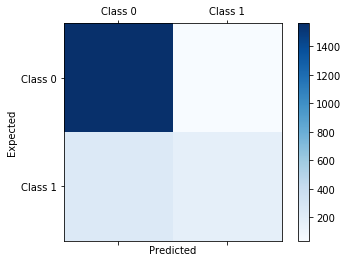

In [24]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [26]:

#Compile the model using Adam
adam=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])
#Initialize Sequential model
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(activation = 'relu', input_dim = 9, units=8))
model2.add(tf.keras.layers.Dense(activation = 'relu', units=8)) 
model2.add(tf.keras.layers.Dense(activation = 'sigmoid', units=1)) 
model2.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model2.summary()
history_adam=model2.fit(X_train, y_train, batch_size=10, epochs=40)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 80        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Train on 8000 samples
Epoch 1/40
8000/8000 [==============================] - 1s 165us/sample - loss: 0.5056 - accuracy: 0.7788
Epoch 2/40
8000/8000 [==============================] - 1s 128us/sample - loss: 0.4321 - accuracy: 0.8214
Epoch 3/40
8000/8000 [==============================] - 1s 126us/sample - loss: 0.4194 - accuracy: 0.8314
Epoch 4/40
8000/8000 [========================

In [27]:
y_pred = model2.predict(X_test)
y_pred = (y_pred > 0.5)
test_loss, test_acc = model2.evaluate(x=X_test,y=y_test)
print("Accuracy: ",test_acc)
print("Loss: ",test_loss)

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

2000/2000 [==============================] - 0s 57us/sample - loss: 0.3457 - accuracy: 0.8620
Accuracy:  0.862
Loss:  0.3457049677371979
Confusion matrix:
 [[1523   72]
 [ 204  201]]


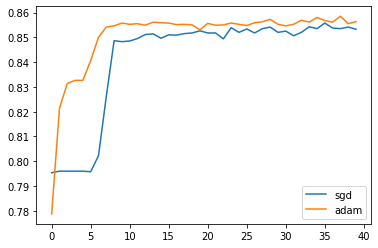

In [34]:
from matplotlib import pyplot
# plot metrics
pyplot.plot(history_sgd.history['accuracy'],label='sgd')
pyplot.plot(history_adam.history['accuracy'],label='adam')

#pyplot.legend([line1, line2, line3], ['sgd', 'adam']
pyplot.legend()

pyplot.show()